In [1]:
from OpenMiChroM.Optimization import CustomMiChroMTraining 
from OpenMiChroM.CndbTools import cndbTools

# type: ignore
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import normalize
import math
import numpy as np
import pandas as pd
from pandas import read_csv
import h5py
import hdf5plugin  
import sys
from scipy import sparse
from pathlib import Path
import glob
from os import path
import os
import scipy as sc
import argparse
import random
import fileinput
import itertools
import linecache
from itertools import islice
from scipy.spatial import distance 
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr, spearmanr
from scipy.signal import savgol_filter
from scipy import stats
from scipy import signal
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
from multiprocessing import Pool
import multiprocessing
from functools import partial
from numpy import linalg as LA
from scipy.stats import entropy
from scipy.cluster.hierarchy import fclusterdata, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


%matplotlib inline

kBinv=1/sc.constants.R*1000

cndbTools = cndbTools()

In [2]:
def calcQ(r1,r2):
    sigma=2*np.ones(shape=comp_dist[0].shape)
    return np.exp(-(r1-r2)**2/(sigma[np.triu_indices_from(sigma)].flatten())**2).mean()

In [3]:
def process_trajectory(i, key=None):
    trajectory = cndbTools.load(folder + '/output_' + str(iteration) 
                                + '_' + str(i) + '/opt_0.cndb')

    list_traj = [int(key) for key in trajectory.cndb.keys() 
                    if not key == 'types']
    list_traj.sort()
    first_snapshot = list_traj[0]
    last_snapshot  = list_traj[-1]

    if not key == None:
        beadSelection = trajectory.dictChromSeq[key]
    else:
        beadSelection = None

    trajs_xyz = cndbTools.xyz(frames=[first_snapshot, last_snapshot+1, snapshot], 
                              beadSelection=beadSelection,
                              XYZ=[0,1,2])

    return trajs_xyz

In [33]:
# Compartment

# base folder with the replicas
folder = "/work/cms16/ro21/optimization/ABNA_50k/chr10/original_dend"
# iteration
iteration = 0
# total number of replicas
number_of_replicas = 32
# analysis output folder
output = folder + "/analysis/"

snapshot = 2000
num_processes = multiprocessing.cpu_count()

print('Number of processors available is ', num_processes)
print()
print("Reading trajectories...")
# Read trajectories of iteration with Number_of_replicas
process_trajectory_partial = partial(process_trajectory, key=None)
with multiprocessing.Pool(num_processes) as p:
    trajs_xyz = p.map(process_trajectory_partial, range(1, number_of_replicas+1))
all_rep_compartment = np.vstack(trajs_xyz)
print('Trajectory/all_rep shape is ', all_rep_compartment.shape)

Number of processors available is  16

Reading trajectories...
Trajectory/all_rep shape is  (160, 2711, 3)


In [34]:
# Compartment

# base folder with the replicas
folder = "/work/cms16/ro21/optimization/AB_sub_50k/chr10/original/"
# iteration
iteration = 0
# total number of replicas
number_of_replicas = 32
# analysis output folder
output = folder + "/analysis/"

snapshot = 2000
num_processes = multiprocessing.cpu_count()

print('Number of processors available is ', num_processes)
print()
print("Reading trajectories...")
# Read trajectories of iteration with Number_of_replicas
process_trajectory_partial = partial(process_trajectory, key=None)
with multiprocessing.Pool(num_processes) as p:
    trajs_xyz = p.map(process_trajectory_partial, range(1, number_of_replicas+1))
all_rep_subcompartment = np.vstack(trajs_xyz)
print('Trajectory/all_rep shape is ', all_rep_subcompartment.shape)

Number of processors available is  16

Reading trajectories...
Trajectory/all_rep shape is  (160, 2712, 3)


In [35]:
all_rep_subcompartment = all_rep_subcompartment[:, 1:, :]
all_rep_subcompartment.shape

(160, 2711, 3)

In [37]:
# comp_dist = []
# for val in all_rep_compartment:
#     comp_dist.append(distance.cdist(val, val, 'euclidean'))

# subcomp_dist = []
# for val in all_rep_subcompartment:
#     subcomp_dist.append(distance.cdist(val, val, 'euclidean'))

# print(len(comp_dist))
# print(len(subcomp_dist))

10
10


In [36]:
# Using list comprehension to compute pairwise Euclidean distances
comp_dist = [distance.cdist(val, val, 'euclidean') for val in all_rep_compartment]
comp_dist = np.array(comp_dist)

subcomp_dist = [distance.cdist(val, val, 'euclidean') for val in all_rep_subcompartment]
subcomp_dist = np.array(subcomp_dist)
comp_dist.shape, subcomp_dist.shape

((160, 2711, 2711), (160, 2711, 2711))

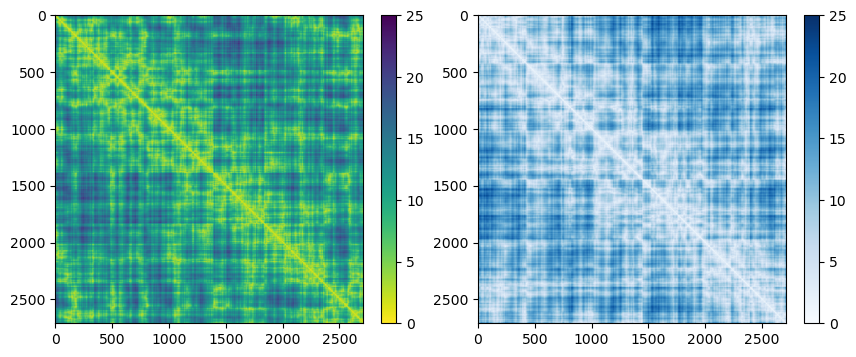

In [104]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
p1 = ax[0].imshow(comp_dist[0], vmin=0, vmax=25, cmap="viridis_r")
plt.colorbar(p1, ax=ax[0], fraction=0.046) #pad=0.04ss
p2 = ax[1].imshow(subcomp_dist[0], vmin=0, vmax=25, cmap="Blues")
plt.colorbar(p2, ax=ax[1], fraction=0.046)

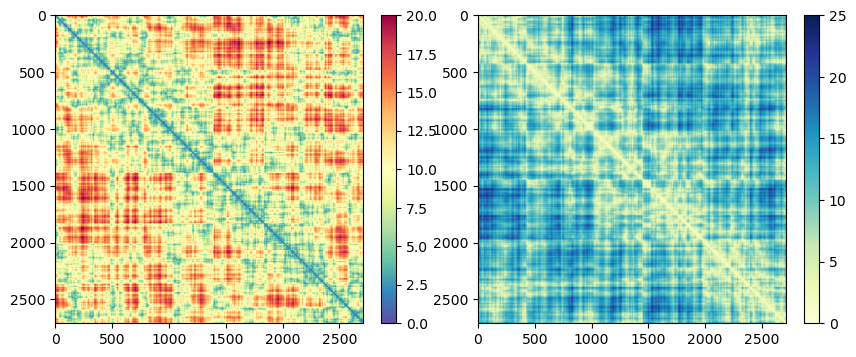

In [100]:
# fig, ax = plt.subplots(1,2, figsize=(10,4))
# p1 = ax[0].imshow(comp_dist[0], vmin=0, vmax=20, cmap="Spectral_r")
# plt.colorbar(p1, ax=ax[0], fraction=0.046) #pad=0.04
# p2 = ax[1].imshow(subcomp_dist[0], vmin=0, vmax=25, cmap="YlGnBu")
# plt.colorbar(p2, ax=ax[1], fraction=0.046)

(0.0, 2711.0, 2711.0, 0.0)

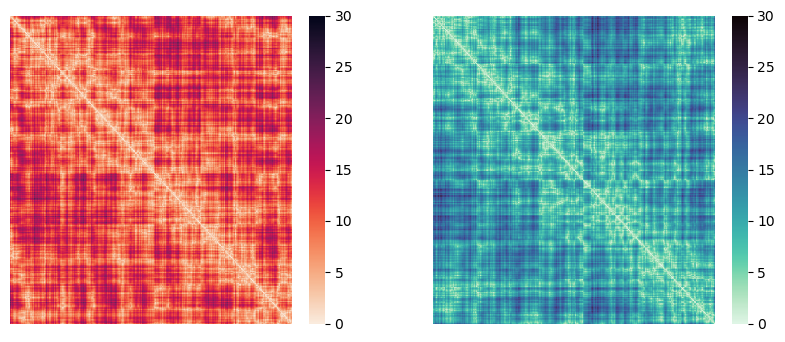

In [94]:
# fig, axes = plt.subplots(1,2, figsize=(10,4))
# p1 = sns.heatmap(comp_dist[0], ax=axes[0], cmap="rocket_r", vmin=0, vmax=30)
# p2 = sns.heatmap(subcomp_dist[0], axes=axes[1], cmap="mako_r", vmin=0, vmax=30)
# axes[0].axis('off')
# axes[1].axis('off')


(0.0, 2711.0, 2711.0, 0.0)

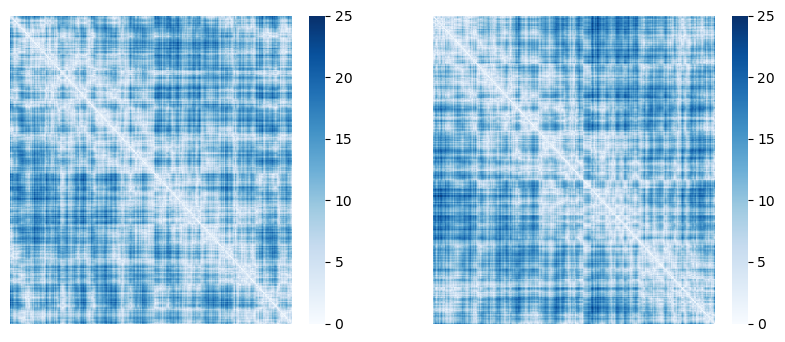

In [108]:
# cmap = "Blues"
# fig, axes = plt.subplots(1,2, figsize=(10,4))
# p1 = sns.heatmap(comp_dist[0], ax=axes[0], cmap=cmap, vmin=0, vmax=25)
# p2 = sns.heatmap(subcomp_dist[0], axes=axes[1], cmap=cmap, vmin=0, vmax=25)
# axes[0].axis('off')
# axes[1].axis('off')

In [116]:
# X=[]
# for val in range(len(comp_dist)):
#     # wt_dist[val][wt_dist[val]>5]=0
#     X.append(comp_dist[val][np.triu_indices_from(comp_dist[val])].flatten())
# for val in range(len(subcomp_dist)):
#     # dsmc_dist[val][dsmc_dist[val]>5]=0
#     X.append(subcomp_dist[val][np.triu_indices_from(subcomp_dist[val])].flatten())

# X=np.array(X)
# X.shape

(200, 3676116)

In [37]:
# Create a flatten distance array for each frame
X1 = [comp_dist[val][np.triu_indices_from(comp_dist[val])].flatten() 
      for val in range(len(comp_dist))]

X2 = [subcomp_dist[val][np.triu_indices_from(subcomp_dist[val])].flatten()
      for val in range(len(comp_dist))]

X = np.vstack((X1,X2))
print(X.shape)

[[0.         1.02035383 1.45237363 ... 0.         0.94672976 0.        ]
 [0.         1.03913115 1.82091431 ... 0.         0.92443107 0.        ]
 [0.         0.99317807 1.3607367  ... 0.         0.93578153 0.        ]
 ...
 [0.         1.01497942 1.7162387  ... 0.         0.94059979 0.        ]
 [0.         0.98176252 1.0751742  ... 0.         0.9417748  0.        ]
 [0.         0.90189236 1.84263281 ... 0.         0.97322235 0.        ]]


In [129]:
# # # Z = linkage(X, method="weighted", metric=calcQ) 
# Z = linkage(X, method="weighted", metric='euclidean')

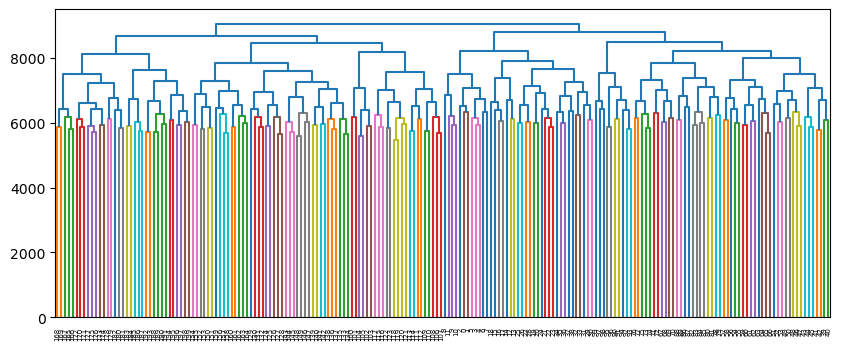

In [121]:
# fig = plt.figure(figsize=(10, 4))
# dn = dendrogram(Z)

In [133]:
# fclust = fcluster(Z, 9000, criterion='distance')
# print(len(np.unique(fclust)), len(fclust))

2 200


In [134]:
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

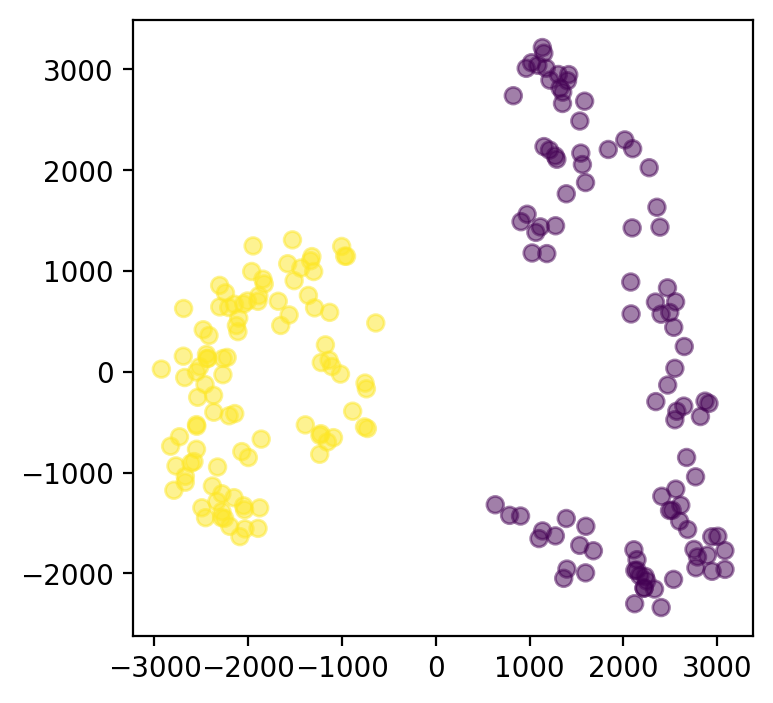

In [135]:
# fig,ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
# # ax.scatter(principalDf["PC1"], principalDf["PC2"], c=['C0']*499+['C1']*499,alpha=0.5)
# # ax.scatter(principalDf["PC1"][20:], principalDf["PC2"][20:], c=['C0'],alpha=0.5, label='$\\Delta$ SMC')
# # ax.scatter(principalDf["PC1"][:30], principalDf["PC2"][:30], c=['C1'],alpha=0.5, label="WT")
# ax.scatter(principalDf["PC1"], principalDf["PC2"], c=fclust,alpha=0.5)
# # ax.set_xlim(-1000,1000)
# # ax.set_ylim(-1000,1000)
# # ax.set_xlabel("PC 1 ({:.2f})".format(pca.explained_variance_ratio_[0]), fontsize=16)
# # ax.set_ylabel("PC 2 ({:.2f})".format(pca.explained_variance_ratio_[1]), fontsize=16)
# # ax.legend(loc='lower left', fontsize=14,ncols=2)

In [ ]:
# tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=800, metric=calcQ)
# tsne_results = tsne.fit_transform(X)

Text(0, 0.5, 't-SNE2')

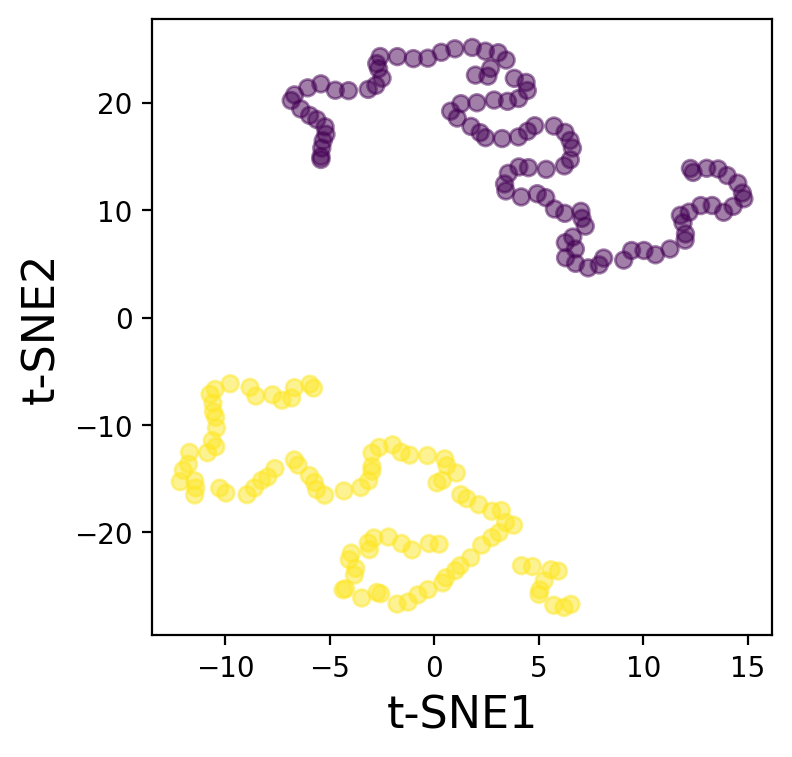

In [ ]:
# fig,ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
# # ax.scatter(tsne_results[:100,0], tsne_results[:100,1],c='C0',alpha=0.5, label='$\\Delta$ SMC' )
# # ax.scatter(tsne_results[100:,0], tsne_results[100:,1],c='C1',alpha=0.5 , label="WT")
# ax.scatter(tsne_results[:,0], tsne_results[:,1],c=fclust,alpha=0.5)
# # ax.legend(fontsize=14,ncols=2)
# ax.set_xlabel("t-SNE1", fontsize=16)
# ax.set_ylabel("t-SNE2", fontsize=16)
# # ax.set_ylim(-18,18)
# # ax.set_xlim(-18,18)

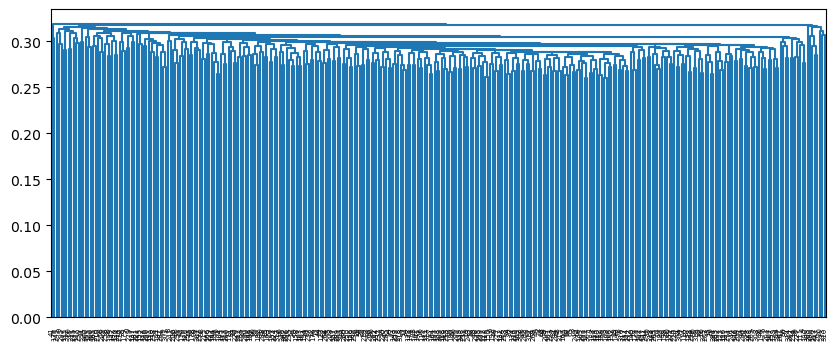

In [38]:
# NOTE: Need to run again
Zq = linkage(X, method="weighted", metric=calcQ) 

fig = plt.figure(figsize=(10, 4))
dn = dendrogram(Zq)

In [39]:
fclust = fcluster(Zq, 0.3, criterion='distance')
print(len(np.unique(fclust)), len(fclust))

43 320


In [40]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

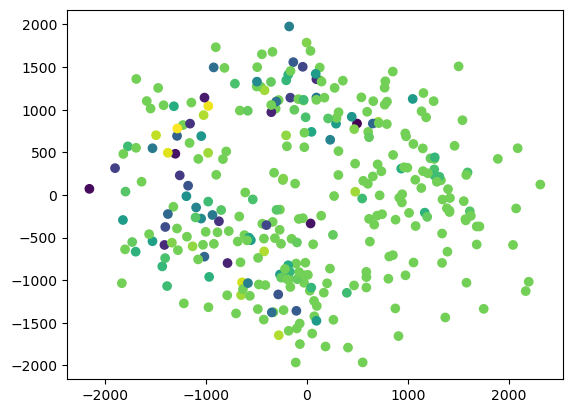

In [41]:
fig,ax = plt.subplots(1,1) #, figsize=(4,4), dpi=200)
ax.scatter(principalDf["PC1"], principalDf["PC2"], c=fclust) #,alpha=0.5)